# Unsupervised Learning

This notebook is about applying feature reduction techniques and clustering algorithms, which are the two most common unsupervised tasks in machine learning. 

### Agenda

1. Principal Component Analysis
  * Applying PCA
  * Scaling
  * Multi-collinearity
  * Combining PCA and prediction
2. Clustering 
  * Partitional methods
  * Hierarchical methods
  * Evaluating clustering results
  * Combining feature reduction and clustering
3. Alternative dimension reduction techniques 
  * t-SNE
  * UMAP

## Recap of Breast Cancer Wisconsin data set

We aim to use image-based features to learn how to classify a tumour as Benign (non-cancerous/harmless) or Malignant (cancerous/harmful). Image-based features (or attributes) are retrieved from biopsy images of breast tissues.

<img src="PS4/Img/breast_cancer_benign_vs_malign.png"/>

* **Tumour**: A tumour is an abnormal lump or growth of cells on a part of the body.
* **Benign Tumour**: A tumour that is not harmful and non-cancerous.
* **Malignant Tumour**: A tumour that is harmful and cancerous.

*Text and figure retrieved from https://medium.com/data-science-365/building-a-machine-learning-model-on-cancer-data-cd42c56721f4*

## 1. Principal component analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. 

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal the preceding components.

The resulting vectors are an uncorrelated orthogonal basis set.

#### Why do we use PCA ?

* To find inter-relation between variables in the data.
* To interpret and visualize data.
* To reduce the number of variables to be used for othe ML tasks.

PCA is sensitive to the relative scaling of the original variables.

### Load modules & data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Split in training and testing
If we were using just unsupervised learning techniques to explore the patterns in the data we could use the whole data set. However, we'll try to use the PCA results for classification later. So let's apply split our dataset in training and test set.

In [3]:
# Split in training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25)

### Apply PCA without pre-processing

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # we can specify the number of components
x_pca = pca.fit_transform(X_train)

Please be aware that *fit_transform* will first determine the principal components from the training data and then it will also apply the *'transform'* funtion to the data. On hte test set we just need to use *'transform'*.

After computing the PCs we can check the explained variance

In [5]:
print(x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(426, 10)
[9.81175743e-01 1.67836074e-02 1.82151234e-03 1.27682900e-04
 7.85195606e-05 7.27429734e-06 4.21637980e-06 8.52492882e-07
 3.33386134e-07 1.57013019e-07]
0.999999898620764


The above result shows more than 99% of the variance in the data can be expressed just by the first component. 

This happens in cases where there is high collinearity (close to linearly dependent rows). Collinearity causes PCA to overemphasize the explained variance of components related to highly correlated (or redundant) variables thereby giving less weight to other components. 

#### Plot the explained variance ratio

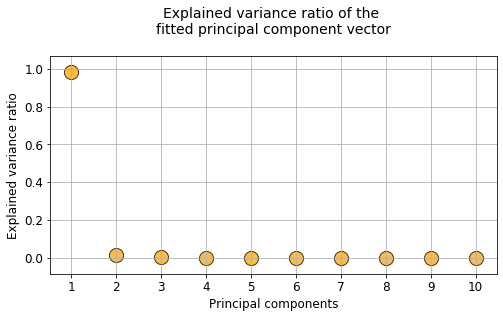

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=14)
plt.xlabel("Principal components",fontsize=12)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Explained variance ratio",fontsize=12)
plt.show()

###  PCA on scaled/standardized data

Standardizing transforms the data to a data with zero mean and a standard deviation of one (unit variance).

Performing PCA on unstandardized features yields a biased result: PCA assigns large loadings on features with high variances.

In [7]:
from sklearn.preprocessing import StandardScaler # Always scale data for good results on PCA
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_train)
X_te_sc = scaler.transform(X_test)

In [8]:
print(np.mean(X_tr_sc, 0)) # mean over rows
print(np.std(X_tr_sc, 0)) # standard deviation over rows

[-7.00834800e-15  1.36002321e-15  9.93858100e-16 -7.94877987e-17
  5.14194842e-16  1.52134434e-16 -5.08917374e-16 -1.80867319e-16
  3.70478296e-15 -8.46610210e-16 -1.00483654e-16  5.95897875e-16
  1.44446270e-16  4.21741411e-16 -1.90703934e-15  1.89480669e-15
 -1.13889076e-16 -6.70433974e-16 -1.56108824e-16 -1.87838790e-16
  5.39083645e-16  2.84618443e-15 -4.59726154e-16  6.69391511e-16
  2.46151560e-15  8.92836926e-16 -8.95052160e-17 -4.38485972e-17
  2.46607638e-15 -1.42687114e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


After making sure we scaled the data correctly, let's try applying PCA again:

In [9]:
pca_sc = PCA(n_components=0.95) # we can specify the number of components OR the desired minimum explained variance
x_pca_sc = pca_sc.fit_transform(X_tr_sc)
print(x_pca_sc.shape)
print(pca_sc.explained_variance_ratio_) 
print(pca_sc.explained_variance_ratio_.sum())
loadings = pca_sc.components_

(426, 10)
[0.43022535 0.19634827 0.09910882 0.06587416 0.05494675 0.04031029
 0.02345109 0.0160344  0.01447004 0.01062366]
0.9513928296411123


In this case, we can observe that 10 components explain 95% of the variance. 

By using the scaled data PCA projects more features/variables which are crucial to breast cancer prediction. 
* From this, we can conclude that PCA with out scaling can hide features with smaller magnitude which are usable to the prediction. 
* We can further see how removing collinear features from the scaled can affect PCA here below.

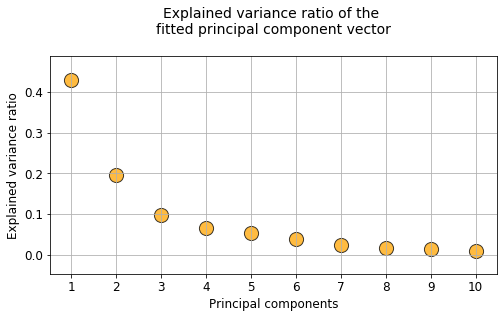

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(pca_sc.explained_variance_ratio_))],
            y=pca_sc.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=14)
plt.xlabel("Principal components",fontsize=12)
plt.xticks([i+1 for i in range(len(pca_sc.explained_variance_ratio_))],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Explained variance ratio",fontsize=12)
plt.show()

### Collinearity

Collinearity refers to the non-independence of predictors, usually in a regression‐type analysis.
E.g. when two or more predictor variables are correlated, it is diffcult to distinguish their effects on the response (or target) variables.
Moreover, collinearity can inflate the variance of regression coefficients. This can cause at least some regression coefficients to have the wrong sign.

#### How is collinearity identified?

* Examine the correlation coefficient for each pair of independent variables. 
* Variance inflation factors (VIF) are also very useful.

#### Let's use correlation to detect collinearity

Now, looking at the covariance matrix of the features, we can identify variables with more than 85% correlation (85% selected as a threshold here, but other values can be used as well)

What about the collinearity-related issue? 

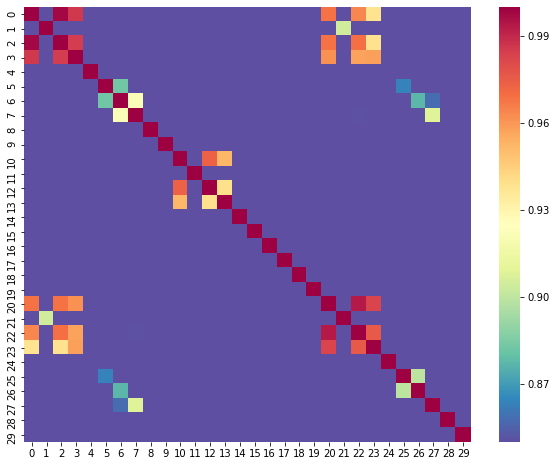

In [11]:
#x_axis_labels = data.columns[:-1]
cor=np.corrcoef(X_train.T)
plt.figure(figsize=(10, 8))
axis_labels = cancer.feature_names
sns.heatmap(cor, vmin=0.85, vmax=1, cmap=plt.cm.Spectral_r)#, 
            #xticklabels=x_axis_labels, yticklabels=x_axis_labels)

From the above plot, we can see the following features are highly correlated:
* feature 0,2,3, 20, 22, 23 (radius, area, perimeter),this makes sense since area and perimeter are computed from radius. We keep 0 (mean radius) and 20 (worst radius), and discard the rest.
* feature 10, 12, 13 are highly correlated to eachother. Keeping feature 10, we can leave the rest out.

In [12]:
cancer.feature_names[[2, 3, 22, 23, 12, 13]]

array(['mean perimeter', 'mean area', 'worst perimeter', 'worst area',
       'perimeter error', 'area error'], dtype='<U23')

### PCA after removing collinear variables

Here, PCA is applied on the saled data after removing some of the collinear features identified above. Let's see how removing redundant/collinear variables affects PCA results.

In [13]:
xx_train = np.delete(X_tr_sc, [2, 3, 22, 23, 12, 13], axis = 1)
print(xx_train.shape)

(426, 24)


In [14]:
pca_red = PCA(n_components=0.95) # we can specify the number of components OR the desired minimum explained variance
xx_pca = pca_red.fit_transform(xx_train)
print (xx_pca.shape)
print(pca_red.explained_variance_ratio_) 
print (pca_red.explained_variance_ratio_.sum())
loadings = pca_red.components_

(426, 11)
[0.41647059 0.16542747 0.10783068 0.07868364 0.06370598 0.05028344
 0.0207468  0.01927175 0.01486048 0.01183008 0.01095628]
0.9600671760195032


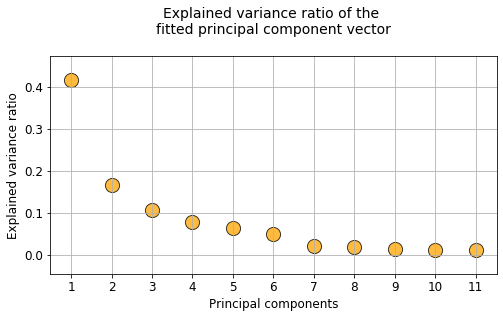

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(pca_red.explained_variance_ratio_))],
            y=pca_red.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=14)
plt.xlabel("Principal components",fontsize=12)
plt.xticks([i+1 for i in range(len(pca_red.explained_variance_ratio_))],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Explained variance ratio",fontsize=12)
plt.show()

Not a dramatic difference, but if you check the values we have slightly more weight on components other than the first one (compared to scaled data including redundant/collinear features).

### Visualizing high dimensional data using PCA
The two largest principal components provide a useful window into high dimensional data. Plotting the class labels with the **PCs** as axes yields a useful visualization of the data as a whole.

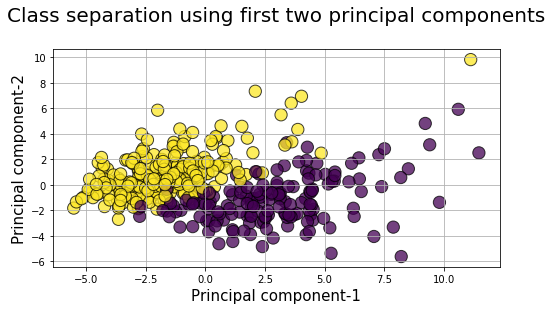

In [16]:
plt.figure(figsize=(8,4))
plt.scatter(xx_pca[:,0], xx_pca[:,1], c=y_train, edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

### Combining PCA and classifiers

We can observe the first two principal components separate the two classes (Malignant vs. Benign) pretty well. 

The **PCs** could be used as inputs to a supervised learning algorithm.

Let's try a simple linear classifier on the first two PCs:

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(xx_pca[:,:2], y_train);

/Users/vittfo/anaconda3/envs/gwbi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Before evaluating accuracy, we need to prepare the test set:
* remove the selected features
* project test data to the first 2 PCs of training data

In [18]:
xx_test = np.delete(X_te_sc, [2, 3, 22, 23, 12, 13], axis = 1)
xx_test = pca_red.transform(xx_test)

In [19]:
y_predict = classifier.predict(xx_test[:,:2])

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
print('Accuracy: %.3f' % score)

Accuracy: 0.972


In [21]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_predict, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.978


### Using PCA to select the most informative features

The principal components are calculated from feature data without information of the target, hence PCA is an unsupervised method. 

Interpreting the components can be difficult since they are a usually composed of a mixture of features in the original data. A heat map can help to visualize the linear combinations corresponding to each component.

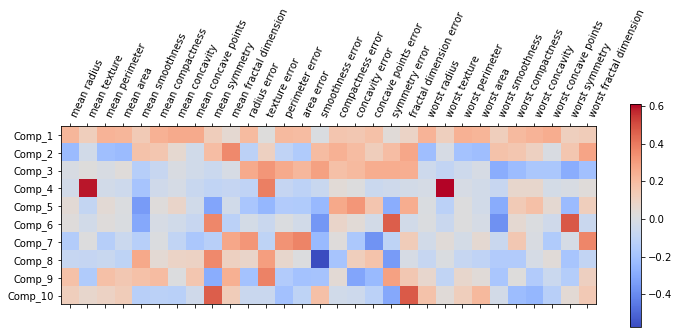

In [22]:
plt.matshow(pca_sc.components_,cmap='coolwarm')
row_names = ['Comp_' + str(i+1) for i in range(pca_sc.components_.shape[0])]
plt.yticks(range(pca_sc.components_.shape[0]),row_names,fontsize=10)
plt.colorbar()
#plt.xticks(range(len(data.columns[:30])),data.columns[:30],rotation=65,ha='left')
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
#plt.grid(b=None)
plt.grid(False)
plt.show()

## 2. Clustering

Clustering aims to divide a set of data points (e.g. sample patients or genes) into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups.

Clustering algorithms can be very useful. Perhaps, in the medical field, researchers apply clustering algorithms on gene expression data to **(1)** identify groups of patients who respond differently to medical treatments (if we cluster the *samples*), or to **(2)** identify gene modules associated with a disease status (if we cluster the *genes*). 

There are many different approaches to clustering, which are divided in categories.

Each of these categories has its own unique strengths and weaknesses. 

This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data.

Three popular categories of clustering algorithms:

1. Partitional clustering (e.g. K-means)
2. Hierarchical clustering
3. Density-based clustering


### 2.1. Partitional Clustering

Partitional clustering divides data objects into nonoverlapping groups. 

Basically, one object cannot be a member of more than one cluster, and every cluster must have at least one object.

For these techniques, we need to know in *guess* the number of clusters (**k**). 

Two examples of partitional clustering algorithms are k-means and k-medoids. 

They both implement an iterative process which assign subsets of data points into k clusters.

<img src="PS4/Img/kmeansViz.png"/>

*Figure retrieved from https://stanford.edu/~cpiech/cs221/handouts/kmeans.html*

Both of these methods are **nondeterministic**, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Pros:

* *They work well when clusters have a spherical shape.*
* *They’re scalable with respect to algorithm complexity.*

Cons:

* *They’re not well suited for clusters with complex shapes and different sizes*
* *They break down when used with clusters of different densities.*

#### Applying the K-means algorithm

In [23]:
data_set = load_breast_cancer() # load the breast cancer dataset
X = data_set.data[:,0:2]  # restrict patient data to two features.

Standardise the data:

In [24]:
sc = StandardScaler() 
sc.fit(X)
X_std = sc.transform(X)

And now we will group patients into three clusters (k=3), and print the centre of each cluster. In this case each cluster centre has two coordinates, corresponding to the standardised features that we are using. 

In [25]:
from sklearn.cluster import KMeans
# create a k-means object
kmeans = KMeans(n_clusters=3, random_state=1)  
kmeans.fit(X_std)  
print('\nCluster centres:')
print(kmeans.cluster_centers_)


Cluster centres:
[[-0.50925763 -0.735464  ]
 [ 1.52122912  0.58146379]
 [-0.299417    0.9173596 ]]


*kmeans.labels_* contains the cluster labels of each sample. 

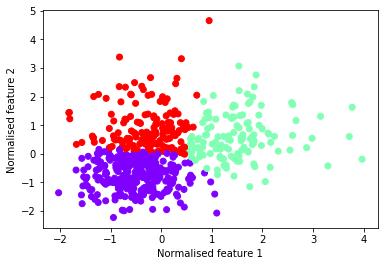

In [26]:
labels = kmeans.labels_
# let's plot the data points
plt.scatter(X_std[:,0],X_std[:,1],
            c=labels, cmap=plt.cm.rainbow)
plt.xlabel('Normalised feature 1')
plt.ylabel('Normalised feature 2')
plt.show() 

#### How do we evaluate the goodness of a clustering result ?

The silhouette coefficient is a measure of cluster cohesion and separation. 

It quantifies how well a data point fits into its assigned cluster based on two factors:

* How close the data point is to other points in the cluster
* How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. 
Values closer to 1 indicate that samples are closer to samples in their clusters than they are to samples in other clusters.

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(X_std, kmeans.labels_)

0.40819709354502093

#### Choosing the appropriate number of clusters with the silhouette score

Sometimes we may have prior knowledge that we want to group the data into a given number of clusters. Other times we may wish to investigate what may be a good number of clusters.

In the example below we look at changing the number of clusters between 1 and 100 and measure the average distance points are from their closest cluster centre 

In [28]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice that 2 clusters is the minimum
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k suggests that the best choice for k is 2 since it has the maximum score

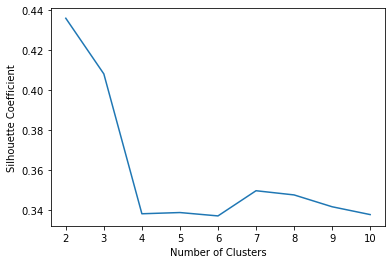

In [29]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### Choosing the appropriate number of clusters with the elbow method

The k-means algorithm minimizes the sum of the squared error (SSE) by iteratively changing the assignments and centroids in separate steps until convergence (cluster assignments are not changed). 

The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. 

We can use the SSE compiled in the last iteration of the k-means algorithm (stored as *inertia* param) to evaluate the goodness of a clustering result. 

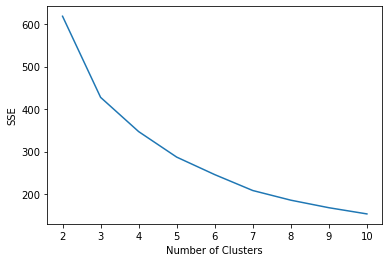

In [30]:
# A list holds the SSE values for each number of clusters k
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
    
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Note! K-Means does not explicitly use pairwise distances between data points at all (differently from hierarchical and some other clusterings which allow for arbitrary proximity measure).

It aims to minimize the distance between the assigned points and the compiled centroids. 

However, K-Means is implicitly based on pairwise Euclidean distances between data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. 

More info on the k-means algorithm available here https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

Other algorithms for partitional clustering:

* K-medoids
* CLARA

K-means attempts to minimize the total *squared error*, while k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. 

In contrast to the k-means algorithm, k-medoids chooses datapoints as centers (k-medoids are roughly comparable to the medians) with the idea being that the median is more robust to outliers than the arithmetic mean.

Also, k-medoids works with any similarity measure. 

K-means may fail to converge when used with a non-euclidean distance/dissimilarity because it relies on the mean. E.g. Absolute Pearson Correlation can’t be used with k-means, but it works well with k-medoids.

### 2.2. Hierarchical Clustering


Hierarchical clustering determines cluster assignments by building a hierarchy. 

This is implemented by either a bottom-up or a top-down approach:

* Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

* Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a dendrogram. 

Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

*Pros*:

* They often reveal the finer details about the relationships between data objects.
* They provide an interpretable dendrogram.

*Cons*:

* computationally expensive with respect to algorithm complexity.
* sensitive to noise and outliers.

<a id="tcga_pancan"></a>
#### The Cancer Genome Atlas (TCGA) Pan-Cancer analysis

These data contain gene expression values from a manuscript authored by The Cancer Genome Atlas (TCGA) Pan-Cancer analysis project investigators.

In the original data there are 881 samples (rows) of five distinct cancer subtypes. Each sample has gene expression values for 20,531 genes (columns). 

The dataset is available from the UC Irvine Machine Learning Repository, but you can use the included data which has been cut down to 801 samples and 5000 genes with the highest variance to reduce the filesize.

In [45]:
tcga_data = pd.read_csv('PS4/data.csv.zip')
tcga_labels = pd.read_csv('PS4/labels.csv', index_col = 0)

Let's quickly check the data:

In [46]:
tcga_data.shape

(801, 5000)

In [47]:
tcga_data.head()

,gene_17471,gene_3123,gene_2899,gene_884,gene_17868,gene_7907,gene_1949,gene_17815,gene_3937,gene_16090,...,gene_15897,gene_11250,gene_3541,gene_19661,gene_3540,gene_15589,gene_15301,gene_15898,gene_9175,gene_9176
0,10.600749,4.852678,8.766969,0.591871,1.822037,1.334282,5.527849,0.591871,6.727662,2.185898,...,9.595069,18.015981,5.788312,1.094912,4.997134,0.00000,13.618145,1.334282,17.173570,18.525161
1,11.464352,1.813607,8.010148,0.587845,1.590818,3.329827,3.467410,0.000000,8.291834,2.399417,...,14.001091,1.004394,13.059513,11.169775,6.736605,0.00000,0.000000,13.609213,0.000000,0.000000
2,7.498450,2.228018,6.748126,0.000000,0.452595,0.796598,3.186960,0.000000,3.718120,1.839758,...,8.172052,7.799819,5.155361,0.000000,7.009739,0.00000,12.759976,1.074163,14.818422,16.053597
3,10.298063,3.239245,7.582481,0.000000,0.434882,1.791814,4.533738,0.000000,6.984008,2.384464,...,11.765829,11.913121,5.983377,1.031960,5.445151,0.00000,12.353276,0.434882,17.371079,18.371794
4,12.152621,3.019133,8.343346,0.000000,3.785791,0.649386,2.967630,0.360982,7.189617,1.275841,...,4.603502,1.095654,8.349648,12.783131,8.077916,14.97592,0.000000,1.095654,1.580097,0.000000


In [49]:
tcga_labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


The labels are strings containing abbreviations of cancer types:

* **BRCA**: Breast invasive carcinoma
* **COAD**: Colon adenocarcinoma
* **KIRC**: Kidney renal clear cell carcinoma
* **LUAD**: Lung adenocarcinoma
* **PRAD**: Prostate adenocarcinoma

#### Apply hierarchical clustering

Three main steps:
1. Calculate the distance between objects (e.g. euclidean- or correlation-based distance)
2. Apply a linkage startegy (e.g. complete, average, single, etc.)
3. Visualize the dendrogram and select the the number of clusters by indicating H or K.

Here we implement hierarchical clustering by using the *scipy* module.

First, let's use the *pdist* function from the module scipy

In [50]:
from scipy.spatial.distance import pdist
dist_data = pdist(tcga_data, 'correlation')

In [51]:
print(type(dist_data))
print(dist_data.shape)

<class 'numpy.ndarray'>
(320400,)


A condensed distance matrix returned by pdist can be converted to a distance matrix by using *scipy.spatial.distance.squareform*

In [52]:
from scipy.spatial.distance import squareform
dist_mat = squareform(dist_data)

In [53]:
print(type(dist_mat))
print(dist_mat.shape)

<class 'numpy.ndarray'>
(801, 801)


Be careful to check the dimensions of the intermediate results/data you generate to avoid issues. 

In this example, our goal is to cluster the samples/patients. So we should make sure the distance are calculated between samples (not genes).

In [54]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(dist_data, "complete")

We can now plot the dendrograms obtained using the *dendrogram* function. The numbers at the bottom of the plot identify each observation:

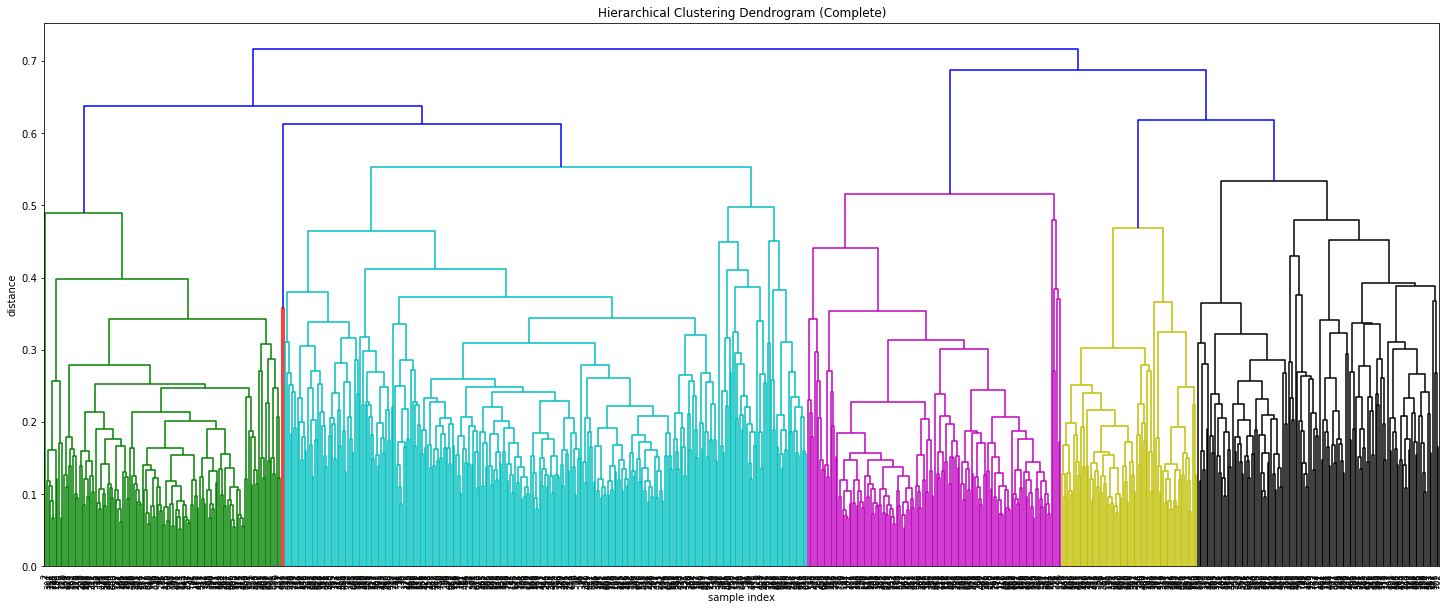

In [55]:
from scipy.cluster.hierarchy import dendrogram

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (Complete)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    color_threshold=0.6,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

How should we read the dendrogram? 

On the x axis we see the labels of the objects we want to clusterize or group. 

On the y axis we see the **distances** (which were calculated based on the correlation distances and the linkage method *'complete'*).

Starting from each label at the bottom, you can see a vertical line up to a horizontal line. The height of that horizontal line tells us about the distance at which this label is merged into another label or cluster. 

We can find that other samples in the cluster by following the other vertical line down again. 

The dendrogram is a graphical illustartion which allows to check different clustering results when imposing different *cuts* on the y axis. Shown above is a cut for height=0.6.

Reading the dendrogram from bottom to top, we should take note if there are **big jumps** of distance to the next merge. They indicate well separated groups which should perhaps be assigned to different clusters.

##### Extract clusters
Now, we are ready to extract one clustering result by using the function *cut_tree* n.

We have two possibilities:
* we can specificy the total number of clusters to be compiled by using the parameter *n_clusters*
* or we can indicate the height at which to cut the tree. 

In [56]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters = 5)[:10,0]) 

[0 1 0 0 2 0 3 0 2 0]


In [57]:
print(cut_tree(hc_complete, height = 0.6)[:10,0])

[0 1 0 0 2 0 3 0 2 0]


**But how do we tune the best number of clusters?**

In the following tutorial you can find the description of common techniques/strategies to identify the best number of clusters when applying hierarchical clustering algorithms.

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

**What about the sklearn module?**

As you may have noticed, we use the *scipy* module to implement the three steps of a hierarchical clustering.

However, the **sklearn** module also provides its implementation of hierarchical clustering namely *AgglomerativeClustering*

In order to build an object *AgglomerativeClustering*, we need to indicate the metric used to evaluate the distance between the objects (*affinity*). Then, we have to specify the the merging criteria (*linkage*). The "ward", "complete", "average", and "single" methods can be used. Finally, we need to set with the *n_clusters* parameter the number of clusters to be compiled.

In [58]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
cluster.fit(tcga_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5,
                        pooling_func='deprecated')

The labels_ property returns an array of integers where the values correspond to the distinct categories.

In [59]:
print(cluster.labels_[:10])

[4 1 0 4 0 4 2 4 0 4]


Do the same using correlation-based distance:

In [60]:
from sklearn.metrics import pairwise_distances

cor_dist_data = pairwise_distances(tcga_data, metric='correlation')

cluster2 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
# Use the distance matrix directly.
cluster2.fit(cor_dist_data)

AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [61]:
print(cluster2.labels_[:10])

[3 1 3 3 0 3 2 3 0 3]


**How do we evaluate the godness of a clustering result when we know the true class labeles?**
### 2.3. ARI

We can apply the scikit-learn implementation of a common metric called the *adjusted rand index* (**ARI**). 

Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

To use the true labels of the PAN cancer dat set we first need to convert the abbreviations to integers with *LabelEncoder*.

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(tcga_labels.iloc[:,0])
true_labels[:5]

array([4, 3, 4, 4, 0])

In [63]:
from sklearn.metrics import adjusted_rand_score

ari_clust_eucl = adjusted_rand_score(true_labels, cluster.labels_)
ari_clust_corr = adjusted_rand_score(true_labels, cluster2.labels_)
print(round(ari_clust_eucl, 2))
print(round(ari_clust_corr, 2))

0.89
0.99


The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

In [64]:
# Compute the silhouette scores for each algorithm
from sklearn.metrics import silhouette_score
sil_clust_eucl = silhouette_score(tcga_data, cluster.labels_).round(2)
sil_clust_corr = silhouette_score(tcga_data, cluster2.labels_).round(2)
print(sil_clust_eucl)
print(sil_clust_corr)

0.24
0.26


~~Based on the above output, you can see that the silhouette coefficient was misleading. ARI shows that the Euclidean-based distance is the best choice for the pan-cancer data set compared to correlation-based distance.~~ Note that the best silhouette score does not always match with the best ARI.

There are several metrics that evaluate the quality of clustering algorithms. Reading through the implementations in scikit-learn (https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) will help you select an appropriate clustering evaluation metric.

### 2.4. Combining PCA and clustering algorithms
Since many clustering algorithms rely on distance measures which lose their meaning in very high-dimensional data,
as an additional pre-processing step before grouping omics-based profiles of patient samples, it’s common to use *dimensionality reduction* which aims at reducing the number of features in the dataset by either removing or combining them.

Let's implement an unsupervised learning strategy where the initial feature space is first transformed by PCA and then the resulting reduced feature space is given input to the k-means algorithm in order to identify best grouping of samples fromt the pan-cancer dataset.

#### Feature scaling

Many features/genes in Pan-Cancer dataset are not normally distributed. Therefore, we should not standardize these features. Instead of *StandardScaler* we can use the *MinMaxScaler*. 

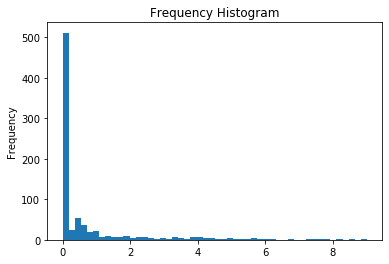

In [65]:
plt.hist(tcga_data.iloc[:,3], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In general, we apply the *MinMaxScaler* when we do not assume that all our features follow the normal distribution.

In [66]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
sc_data = scaler.fit_transform(tcga_data)
sc_data.shape

(801, 5000)

#### Feature transformation

Then, we use the Principal Component Analysis (PCA) as dimensionality reduction technique. 

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
sc_pca = pca.fit_transform(sc_data)

#### Clustering the data

Now that we have a lower-dimensional representation we can use k-means:

In [68]:
from sklearn.cluster import KMeans
# create a k-means object
kmeans = KMeans(n_clusters=5,
                n_init=50,
                max_iter=500,
                random_state=42)

In [69]:
kmeans.fit(sc_pca)  
print('\nCluster centres:')
print(kmeans.cluster_centers_)


Cluster centres:
[[-3.92845024  8.60611608]
 [-0.2684977  -3.25472895]
 [11.62784764  1.67807253]
 [-3.88024938 -0.91617815]
 [-0.54110387 -7.38739859]]


#### Evaluate the performance by calculating the silhouette coefficient:

In [70]:
predicted_labels = kmeans.labels_
silhouette_score(sc_pca, predicted_labels)

0.6028558077696319

#### Calculate ARI, too, since the ground truth cluster labels are available:

In [71]:
adjusted_rand_score(true_labels, predicted_labels)

0.8574016821544791

We can also visualize the data in the context of the true labels and predicted label:

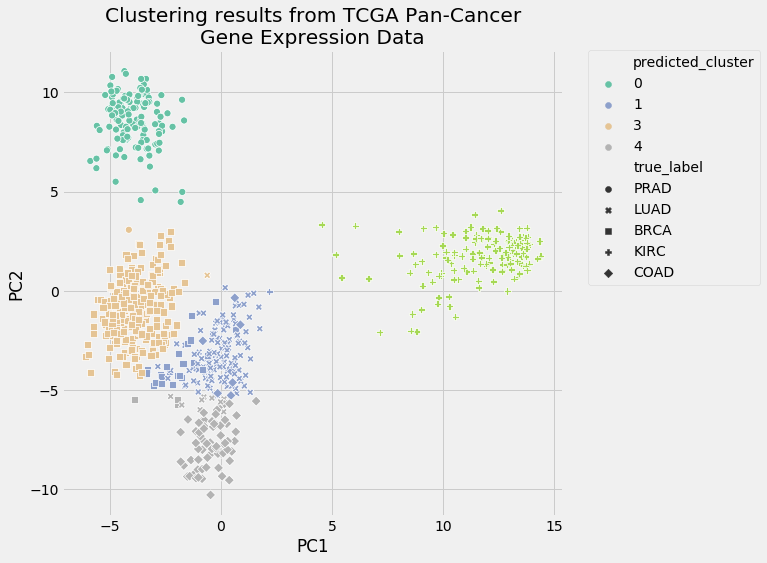

In [72]:
pcadf = pd.DataFrame(sc_pca, columns=["PC1", "PC2"])
pcadf["predicted_cluster"] = predicted_labels
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(x="PC1",y="PC2", s=50, data=pcadf, 
                       hue="predicted_cluster", 
                       style="true_label",
                       palette="Set2")

scat.set_title("Clustering results from TCGA Pan-Cancer\nGene Expression Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

The visual representation of the clusters confirms the results of the two clustering evaluation metrics. The performance of the pipeline was pretty good. The clusters only overlap slightly and cluster assignments are much better than random.

#### Tuning the number of principal components

In [73]:
# Empty lists to hold evaluation metrics
sil_scores = []
ari_scores = []
for n in range(2, 11):
   pca = PCA(n_components=n, random_state=42)
   sc_pca = pca.fit_transform(sc_data)
   kmeans.fit(sc_pca)  
   predicted_labels = kmeans.labels_
   sil_scores.append(silhouette_score(sc_pca, predicted_labels))
   ari_scores.append(adjusted_rand_score(true_labels, predicted_labels))

Let's plot the evaluation metrics as a function of n_components to visualize the relationship between adding components and the performance of the k-means clustering results:

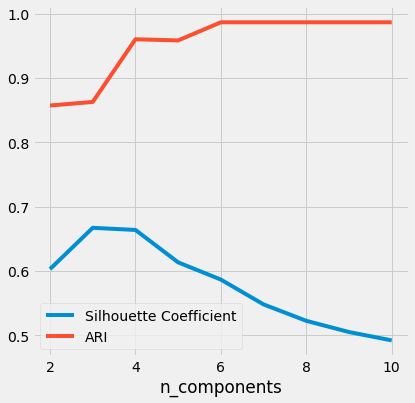

In [74]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), sil_scores, c="#008fd5", label="Silhouette Coefficient")
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")
plt.xlabel("n_components")
plt.legend()
plt.show()

There are two takeaways from this figure:

After 4 dimensions the silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.

The ARI improves significantly as you add components. It appears to start tapering off after n_components=6, so that would be the value to use for presenting the best clustering results from this pipeline.

Like most machine learning decisions, you must balance optimizing clustering evaluation metrics with the goal of the clustering task. In situations when cluster labels are available, as is the case with the cancer dataset used in this tutorial, ARI is a reasonable choice. ARI quantifies how accurately your pipeline was able to reassign the cluster labels.

The silhouette coefficient, on the other hand, is a good choice for exploratory clustering because it helps to identify subclusters. These subclusters warrant additional investigation, which can lead to new and important insights.

https://realpython.com/k-means-clustering-python/

## 3. Alternative dimension reduction techniques: t-SNE and UMAP

The two main approaches to reducing dimensionality are **Projection** and **Manifold Learning**.

* *Projection*: This technique deals with projecting every data point which is in high dimension, onto a subspace suitable lower-dimensional space in a way which approximately preserves the distances between the points.

* *Manifold Learning*: Many dimensionality reductions algorithm work by modelling the manifold on which the training instance lie; this is called Manifold learning. It relies on the manifold hypothesis or assumption, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold, this assumption in most of the cases is based on observation or experience rather than theory or pure logic.

In data science, the most used techiques are PCA, t-SNE and UMAP.
However, most of the time PCA is used as feature reduction step in 'complex' unsupervised or supervised learning task. On the other hand, t-SNE and UMAP for visualising a high-dimensional dataset.

#### t-SNE ( T-distributed stochastic neighbour embedding)

t-SNE was created in 2008 by (Laurens van der Maaten and Geoffrey Hinton) for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

(t-SNE) takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.

An interesting tutorial for the t-SNE approach, which includes also a description of the algorithm implmented by t-SNE in available here https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/.

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(sc_data)

Create a *dataframe* with Pandas including the first two meta-features plus the true class labels.

In [76]:
tsnedf = pd.DataFrame(tsne_results[:,:2], columns=["TSNE1", "TSNE2"])
tsnedf["true_label"] = label_encoder.inverse_transform(true_labels)
tsnedf.head()

,TSNE1,TSNE2,true_label
0,-37.930813,-16.134279,PRAD
1,7.609128,-24.957853,LUAD
2,-33.319527,-20.616188,PRAD
3,-32.834713,-19.592594,PRAD
4,21.470531,7.407273,BRCA


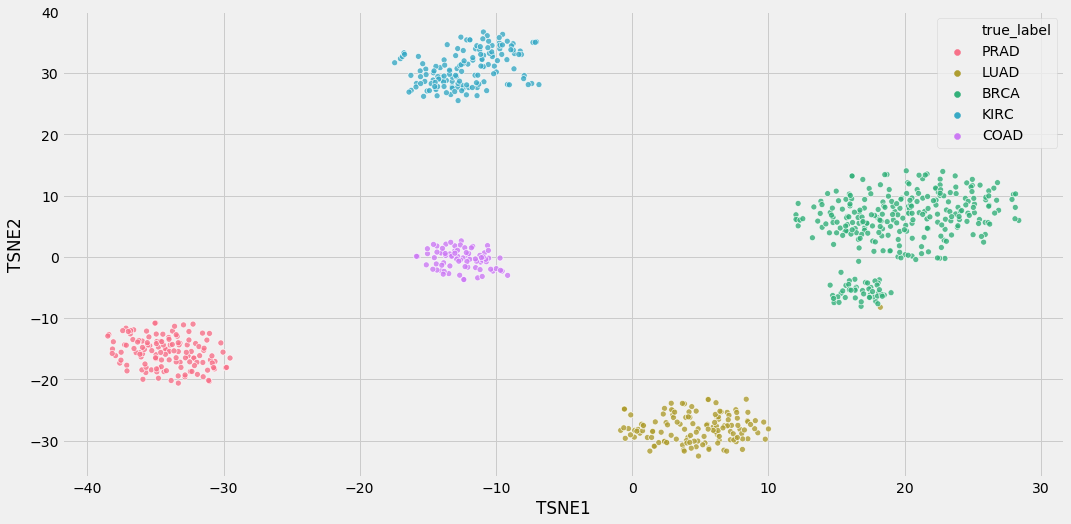

In [77]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
sns.scatterplot(
    x = 'TSNE1', y = 'TSNE2', hue = 'true_label',
    palette = sns.color_palette("husl", 5),
    data = tsnedf,
    legend = "full",
    alpha = 0.8
)
plt.show()

#### Hyperparamters in t-SNE

t-SNE has different hyperparameters that can have an impact on the resulting embeddings:

* **init**. It controls the initialization of embedding. Possible options are *‘random’*, *‘pca’*, and a numpy array of shape (*n_samples*, *n_components*). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.

* **perplexity** *(default: 30)*. It allowss the users to control the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. The choice is not extremely critical since t-SNE is quite insensitive to this parameter. Perplexity is roughly related to how many near neighbors you expect to see around a point. For example, in a densely populated space, you would want to choose a higher value to more efficiently segment the space.

* **learning_rate** *(default: 200.0)*. It is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.

* **n_iter** *(default: 1000)*. It allows to specify maximum number of iterations for the optimization. Should be at least 250.

For more detailed information, I suggest to check out the UMAP documentation:
https://distill.pub/2016/misread-tsne/

### UMAP (Uniform Manifold Approximation and Projection)

Uniform Manifold Approximation and Projection created in 2018 by (Leland McInnes, John Healy, James Melville) is a general-purpose manifold learning and dimension reduction algorithm.
UMAP is a nonlinear dimensionality reduction method and is very effective for visualizing clusters or groups of data points and their relative proximities.
The significant difference with TSNE is scalability, it can be applied directly to sparse matrices thereby eliminating the need to applying any Dimensionality reduction such as PCA or Truncated SVD(Singular Value Decomposition) as a prior pre-processing step.
Put simply, it is similar to t-SNE but with probably higher processing speed, therefore, faster and probably better visualization. 

**UMAP is available from the conda-forge repository as umap-learn.**


In [78]:
import umap
import time

start = time.time()
umapr = umap.UMAP(random_state=42, n_components=2)
umap_results = umapr.fit_transform(sc_data)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 5.774061918258667 seconds


Create a *dataframe* with Pandas including the first two meta-features plus the true class labels.

In [79]:
umapdf = pd.DataFrame(umap_results[:,:2], columns=["UMAP1", "UMAP2"])
umapdf["true_label"] = label_encoder.inverse_transform(true_labels)
umapdf.head()

,UMAP1,UMAP2,true_label
0,14.449340,8.230708,PRAD
1,-1.654111,-3.308996,LUAD
2,13.119641,7.367177,PRAD
3,13.130488,7.544815,PRAD
4,-4.200745,7.154974,BRCA


Compare PCA, t-SNE and UMAP

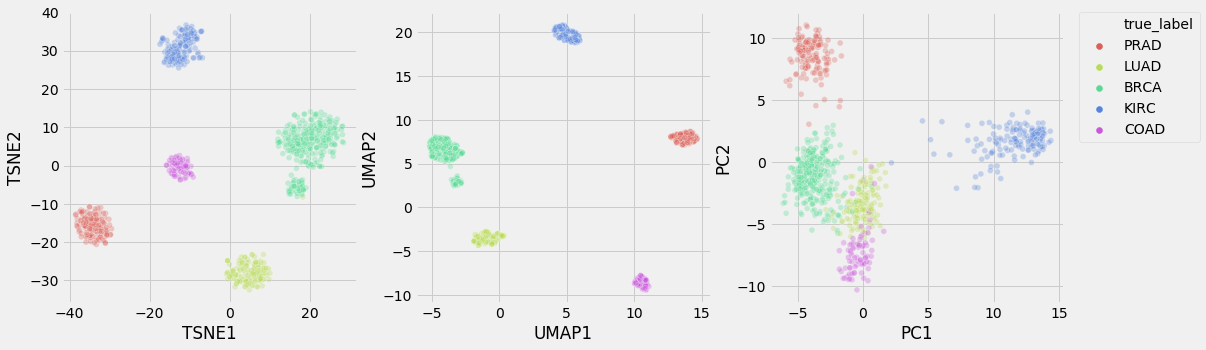

In [80]:
plt.figure(figsize=(16,5))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x = 'TSNE1', y = 'TSNE2', hue = 'true_label',
    palette=sns.color_palette("hls", 5),
    data=tsnedf,
    legend=False,
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x = 'UMAP1', y = 'UMAP2', hue = 'true_label',
    palette=sns.color_palette("hls", 5),
    data=umapdf,
    legend=False,
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x = 'PC1', y = 'PC2', hue = 'true_label',
    palette=sns.color_palette("hls", 5),
    data=pcadf,
    legend='full',
    alpha=0.3,
    ax=ax3
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Hyperparamters in UMAP

UMAP has different hyperparameters that can have an impact on the resulting embeddings:

* **n_neighbors**. It controls how UMAP balances local versus global structure in the data. This low values of n_neighbours forces UMAP to focus on very local structures while the higher values will make UMAP focus on the larger neighbourhoods.

* **min_dist**. It controls how tightly UMAP is allowed to pack points together. Lower values mean the points will be clustered closely and vice versa.

* **n_components**. It allows the user to determine the dimensionality of the reduced dimension space.

* **metric**. It controls how distance is computed in the ambient space of the input data.

For more detailed information, I suggest to check out the UMAP documentation:
umap-learn.readthedocs.io/en/latest/

## Summary
In this notebook we discussed:
* What the popular clustering techniques are and when to use them
* How to implement k-means and hierarchical clustering in Python
* How to evaluate the performance of clustering algorithms
* How to build and tune a robust k-means clustering pipeline in Python
* How to analyze and present clustering results from the k-means algorithm

## Exercises

### 1. T-SNE on Wisconsin breast cancer data
Load the Wisconsin breast cancer data set from sklearn. 

Standardize the data and use t-SNE to visualize it. 

Use the 'target' (benign/malignant) to color the data points. 

### 2. Breast cancer subtypes
Breast cancer is fairly well studied and the current scientific consensus is that there are five distinct molecular subtypes which exhibit different gene expression patterns (some are much rarer than others). 

Cluster BRCA samples from the [pan-cancer TCGA data](#tcga_pancan) using *AgglomerativeClustering*. Use a precomputed correlation distance matrix and the complete linkage method. Use a for loop to test different number of clusters. 

Compute and plot the silhouette score as a function of the number of clusters. Are your findings consistent with the consensus?